<font size=7> Project 6

***Inspection Intro*** 
In this Lab I am going to learn how to use matplotlib by both completing the cells but also going through documentation and understanding how matplotlib actually plots data and what methods it has to do so. I will also understand the different parameters that these methods can take and share them amongst my peers so they can have better looking graphs and just an overall easier time with the Lab. We will then use these skills and apply them in our final project since we want to be able to display nice plots that will make it easier to visualize what we want to explain.

In this homework you learn how to **plot** and **analyze** neurological data from brain organoids similar to this paper: https://www.nature.com/articles/s41467-022-32115-4

# <font color="grey">Notebook Setup

This homework can be done entirely with numpy and matplot lib. So, our first step is to import those packages and load our data file.

In [259]:
import numpy as np
import matplotlib.pyplot as plt

In [260]:
data = np.load("data.npz", allow_pickle=True)

The data that we are working with is raw data that has been packaged together as a zipped numpy array. Lets start by inspecting the structure of this file. 

In [245]:
print(data.files, "\n")
print(f"trains's type is: {type(data['train'])}")
print(f"neuron_data's type is: {type(data['neuron_data'])}")
print(f"redundant_pairs's type is: {type(data['redundant_pairs'])}")
print(f"fs's type is: {type(data['fs'])}")

['train', 'neuron_data', 'redundant_pairs', 'fs'] 

trains's type is: <class 'numpy.ndarray'>
neuron_data's type is: <class 'numpy.ndarray'>
redundant_pairs's type is: <class 'numpy.ndarray'>
fs's type is: <class 'numpy.ndarray'>


We see that the zipped file contains 4 different numpy arrays. Each key corresponds to a different aspect of the recording.

1. `train`: This key contains the spike train data. It is a dictionary where each key corresponds to a neuron, and the value is a list of spike times for that neuron. In other words, for each neuron, we have a list of timestamps indicating when each spike occurred during the recording.

2. `neuron_data`: This key contains additional data about the neurons, such as their spatial positions or other relevant attributes. It helps us understand the context of each neuron's activity.

3. `redundant_pairs`: This key contains information about pairs of neurons that have redundant activity. This can be useful for identifying functional connections or redundancies.

4. `fs`: This key represents the sampling frequency of the recording. It tells us the rate at which the data was sampled, which is crucial for accurate time-based analyses.

In [246]:
# Create a dictionary object from the train object
# Data["train"] returns a 0 dimensional object, .item() extracts the actual dictionary in this object
spike_times = data["train"].item() 
neuron_data = data["neuron_data"].item()
fs = data["fs"]
train = [times / fs for _, times in spike_times.items()]
print(train)


[array([  4.42975,   4.4406 ,   4.4979 ,   4.50935,   4.54545,   4.5741 ,
         4.59045,   4.97665,   5.0057 ,  10.96855,  10.9767 ,  11.0807 ,
        11.1539 ,  11.1802 ,  11.27635,  11.2846 ,  15.67225,  15.70105,
        15.7723 ,  15.79335,  15.8108 ,  15.83555,  15.85225,  15.87315,
        15.9121 ,  15.9534 ,  16.02225,  16.0651 ,  16.08655,  16.191  ,
        21.86245,  21.86825,  22.0048 ,  22.0189 ,  22.0338 ,  22.0553 ,
        22.16315,  22.2496 ,  22.3151 ,  22.33155,  22.3908 ,  27.11175,
        27.12445,  27.2376 ,  27.2577 ,  27.2692 ,  27.3161 ,  27.37115,
        27.79795,  27.80945,  32.2873 ,  32.30825,  32.34225,  32.38165,
        32.41895,  32.44315,  32.54045,  32.56535,  32.5896 ,  32.6235 ,
        32.64285,  32.7032 ,  32.73605,  36.7468 ,  36.91045,  36.95855,
        36.9667 ,  37.00165,  37.01595,  37.08975,  37.12535,  37.2267 ,
        40.4878 ,  42.3452 ,  42.3541 ,  42.48525,  42.6493 ,  43.1896 ,
        47.5197 ,  47.56455,  47.58515,  47.61715,

If you wish to inspect each of these keys further you can print the objects that are defined in the cells above/below. (i.e. `print(spike_times)`)

# Create a Spike Raster

The first step in analyzing our data is to understand the information contained within the train dictionary. This dictionary holds the spike train data for each recorded neuron. Specifically, a spike train is a 2D matrix where each row represents a neuron, and each column is a single moment in time. Each entry in the matrix is a moment in time where a neuron emits a signal. 

In this section we will use the train dictionary to figure out how many neurons there are, the total duration of the recording, and to create a visualization of neuronal activity.

**How many neurons are in our dataset? (3 pts)**

In [247]:
neuron_count = len(train)
print("There are %d neurons in the dataset"%neuron_count)

There are 182 neurons in the dataset


**What is the total duration of our recording? (3 pts)**

In [248]:
spike_moments = []
for neuron in train:
    for spike_time in neuron:
        spike_moments.append(spike_time)
total_duration = max(spike_moments) - min(spike_moments)
print("The total duration of the recording is %f seconds"%total_duration)

The total duration of the recording is 179.751700 seconds


We are now going to visualize the information in the spike train. To do this we will create a "spike raster plot." In a spike raster plot the x-axis represents time and has values from 0 to the duration of the recording. The y-axis values correspond to the neuron number, its range is from 0 to the total number of neurons in the dataset.

Each data point in the plot represents a spike, and any point along a horizontal row corresponds to the spikes of a single neuron over time. This means that each row shows the activity of one neuron, with spikes appearing as dots at the specific times they occurred. 

Raster plots are helpful in vizualizing firing patterns in groups of neurons  

A sample plot has been included below

### raster plot ( 4 pts)

![alt text](spikeraster.png)

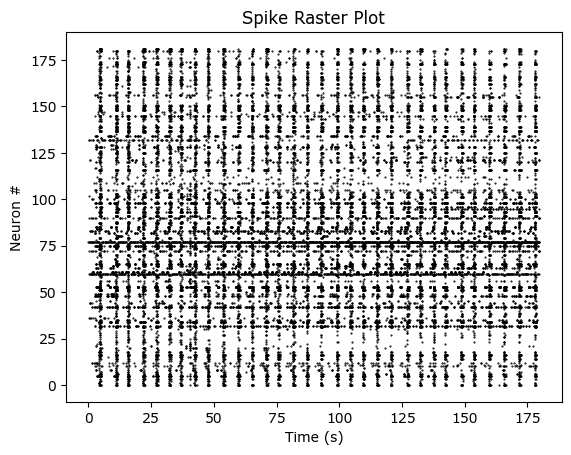

In [249]:
spike_moments = []
neuron_count = []
neuroncount = 0
# we loop through each neuron and then record all the spike times into a list so we can plot it later
for neuron in train:
    for spike_time in neuron:
        spike_moments.append(spike_time)
        neuron_count.append(neuroncount)
    neuroncount +=1
#plotting the different spike times given their neuron
plt.scatter(spike_moments,neuron_count,marker='.',color='black', s=1)

plt.ylabel("Neuron #")
plt.xlabel("Time (s)")
plt.title("Spike Raster Plot")
plt.show()


# Spatial Firing Rate

The next step in our analysis is to visualize the firing rates of neurons in relation to their spatial positions. We will do this by following these steps:

1. Calculate the Average Firing Rate:
    Using only the information contained in the spike train data, we can determine the average firing rate for each neuron. It is defined as the total number of spikes divided by total time (in seconds):

2. Visualize Neuron Positions:
    With the information from the neuron_data key, which contains the spatial positions of each neuron, we can create a plot that shows where each neuron is located.

3. Overlay Firing Rates:
    Finally, we will overlay the average firing rates onto the neuron position plot. This will be done by using bubbles at each neuron's position, where the size of each bubble corresponds to the neuron's average firing rate. 
    
This will allow us to look at how neuronal activity varies across different spatial locations.

## Calculate the Mean Firing Rate for each Neuron (5 pts)


Your answer here should be an array whose length corresponds to the total number of neurons, where each entry corresponds to the average firing rate of that neuron

In [250]:
def calculate_mean_firing_rates(train, recording_length):
    mean_firing_rates = []
    for neuron_spikes in train:
        num_spikes = len(neuron_spikes)
        firing_rate = num_spikes / recording_length
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

In [251]:
#we call the calculate firing rates function for later use
mean_firing_rates =calculate_mean_firing_rates(train, total_duration)

# Plot the Spatial Position of each Neuron (10 pts)
A sample plot has been included below

![alt text](spatialmap.png)

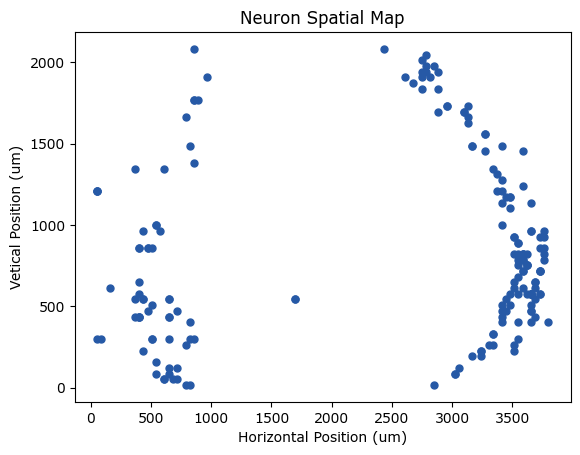

In [252]:
#we went through the dictionary to obtain all the x and y coordinates int he neuron spatial data
x_coords = [neuron_data[neuron]["position"][0] for neuron in neuron_data]
y_coords = [neuron_data[neuron]["position"][1] for neuron in neuron_data]

plt.scatter(x_coords,y_coords,marker='.', color='#2659A6',s=100)
plt.ylabel("Vetical Position (um)")
plt.xlabel("Horizontal Position (um)")
plt.title("Neuron Spatial Map")
plt.show()

# Plot a Spatial Map of Average Single Neuron Firing Rate (5 pts)

We can now combine the list of average firing rates with our spatial map to get a nice visualiation of how firing rate may vary with position.

A sample plot has been included below

Hint: 
You don't need to write new code for this plot. Use the code for your spatial map and add two parameters to the line where you create the plot (refer to the matplotlib documentation). Set each data point's size to depend on its corresponding average firing rate value. Also, adjust for overlapping data points.

![alt text](spatialmap_avg_firing.png)

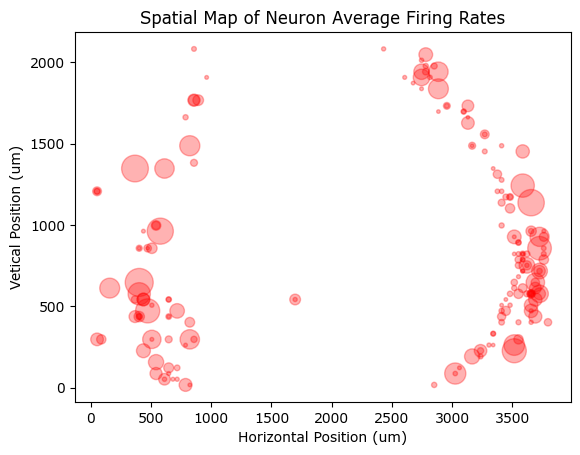

In [253]:
#just reusing the previous coordinates but scaling them for size of mean firing rates
plt.scatter(x_coords,y_coords,marker='.', color='red',s=(mean_firing_rates*250),alpha=0.3)
plt.ylabel("Vetical Position (um)")
plt.xlabel("Horizontal Position (um)")
plt.title("Spatial Map of Neuron Average Firing Rates")
plt.show()


# Plot the Population Level Activity

Remember the raster plot from before? There, we used the spike train data to create a raster plot, and represent the activity of *individual neurons* at points in time. What is we wanted to looked at the *population activity*? 

In this section, we'll lead you through making population level activity plot. This will be similar to the raster plot from before, but instead of showing individual neurons, we'll show the firing rate of the entire population of neurons at each point in time.

First, we'll need to calculate the population firing rate at each point in time. This is a little tricky, so we've given you the function below. 

**Your first task for this section is to add DocStrings and Comments to the function to briefly explain what each line does.**

In [254]:
def get_population_fr(trains: list, bin_size=0.1, w=5):
    
    '''
    This shows the total population of neuron firing at each point in time, so we will see when neurons fire the most.
    Params:
        - What is the trains parameter? This is our spike moment date
        - What is the bin_size parameter? 
    '''

    trains = np.hstack(trains)          #this makes a stack of the 2d array, so moments will line up.                    
    rec_length = np.max(trains)         #This will get the max recording value, aka the total length.
    bin_num = int(rec_length// bin_size) + 1          #This is basically to smooth the data     
    bins = np.linspace(0, rec_length, bin_num)          #more smoothing of the data
    fr = np.histogram(trains, bins)[0] / bin_size       #this is the firing rate histogram
    fr_avg = np.convolve(fr, np.ones(w), 'same') / w    #this smooths the data
    return bins[1:], fr_avg                           #this is data basically

Now that you understand the function to find the average firing rates, **your next job is to plot it!** 

*Hints: Start with calling the function, and using the results as inputs for the plt.plot() function.*
    *Make sure to include x and y labels, and a title for full credit!*
    
 ### population firing rate (10 pts)

![alt text](pop_avg_firing.png)

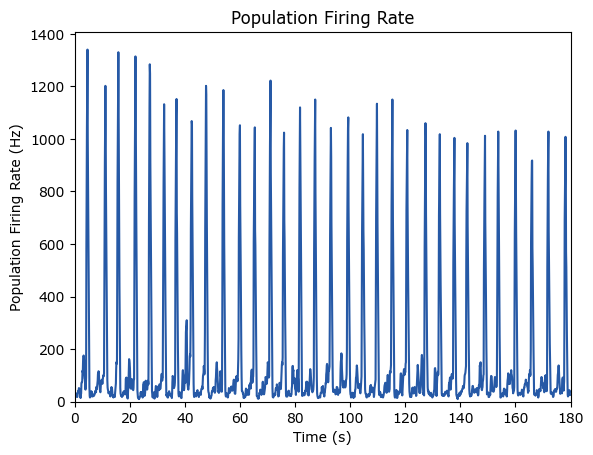

In [255]:
pop_fr = get_population_fr(train)
plt.plot(pop_fr[0],pop_fr[1],color = '#2659A6')
plt.xlabel("Time (s)")
plt.ylabel("Population Firing Rate (Hz)")
plt.title("Population Firing Rate")
plt.xlim(0,180)
plt.ylim(bottom=0)
plt.show()

# Plot Overlayed Graphs - Population and Individual Spike Raster (10 pts)

Learning how to plot multiple graphs on the same figure is a useful skill. **Your job is to combine the *individual neuron* raster plot and the *population activity* plot into one figure.**

![alt text](overlayed_fig.png)

*Steps for getting started:* 
- *Start by creating a figure and axis object using plt.subplots()*
- *Use the axis object to plot the individual neuron raster plot*
- *Use axs1 = axs.twinx() to create a second y-axis on the right side of the plot*
- *Use axs1 to plot the average population firing rate*
- *Make sure to include labels and a title for full credit!*

*It's also very helpful to get used to looking through APIs if you are unsure how to start!*
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.twinx.html

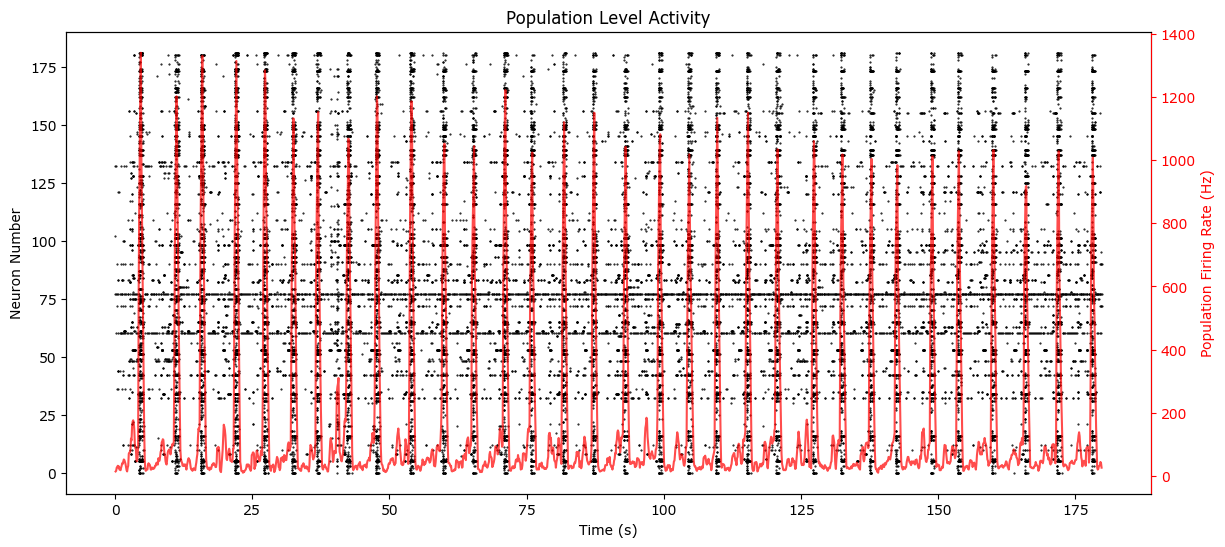

In [256]:

# Here we create the subplots which allow us to plot multiple plots
fig,axis = plt.subplots(figsize =(14,6))
#plotting the raster plot
plt.scatter(spike_moments,neuron_count,marker='.',color='black', s=1)
axis.set_xlabel("Time (s)")
axis.set_ylabel("Neuron Number")
axis.set_title("Population Level Activity")
#twinx for y-axis on right
twingraph = axis.twinx()
pop_fr = get_population_fr(train)
#This is the firing rate
plt.plot(pop_fr[0],pop_fr[1],color = 'red',alpha = 0.7)
twingraph.set_ylabel("Population Firing Rate (Hz)",color ="red")
twingraph.tick_params('y', colors='red')
twingraph.spines['right'].set_color('red')
plt.show()


***Inspection Results***
Team Members: Alex G, Michelle L
My group and I had a discussion over zoom on the best way to loop through the data and intrerpret the 3Dness of the array. I chose to do a nested for loop that would first identify each neuron and then check for each neurons spike times in the next nested for loop. This way we could access a neuron and plot that neuron at each point in time, creating the raster plot we see there. I was having trouble with my plot sice it seemed to be flipped vertically and my teammates, Alex and Michelle pointed out that I was putting my y values in my x values, and my x values in my y values. Afer doing that I was able to fix the rest of my code. I also tried approaching the overlapped graph by saving the raster and population fire graphs as images, but Alex pointed out that this wouldn't overlap correctly since they weren't actually being plotted on the same graph. Alex then explained to me how the subplots worked and it was very helpful, as now I understand that subplots work like a list of plots, and that with the twinx method you can have multiple y-axis that show different values for different plotted subplots. I was also able to help Michelle and Alex on how to calculate the total recording size by showing them the structure of the array, which I understand can seem confusing since numpy arrays dont work the same as normal lists in python. Overall it was a good lab since it taught me a lot of how matplotlib works, which is something I had never handled before.

# Extra Credit - Plot the STTC Heatmap (5 pts)

In this extra credit section, we will explore the functional connectivity between neurons using the Spike Time Tiling Coefficient (STTC). Functional connectivity refers to the statistical dependencies between neuronal activities, indicating how neurons influence each other's firing patterns.

The STTC is a measure used to quantify the temporal correlation between the spike trains of pairs of neurons. It provides a value between -1 and 1, where:

- A positive value indicates a positive correlation (neurons tend to fire together).
- A negative value indicates a negative correlation (neurons tend to avoid firing together).
- A value around 0 suggests no significant correlation.

You are provided with a function that calculates the STTC matrix for the spike train data. The STTC matrix is a square matrix where each element represents the STTC value between a pair of neurons. The matrix has 1's along the diagonal because the values along the diagonal correspond to a pairing of a neuron with itself.

Your task is to use the output matrix to create a heat map of the functional connectivity. This will help you visualize the strength and direction of connectivity between all pairs of neurons in the dataset. You should include a colorbar, proper labels, and axis ticks.

A sample heatmap has been included below.


Hint:
Be mindful of the axis ticks. By default, there will be one tick per neuron, causing the labels to overlap and become unreadable. You need to limit the total number of ticks and space them out evenly with appropriate labels.


The function below computes the sttc matrix. 

In [257]:
def compute_sttc_matrix(spike_train, length, delt=20):
    def time_in_delt(tA, delt, tmax):
        if len(tA) == 0:
            return 0

        base = min(delt, tA[0]) + min(delt, tmax - tA[-1])
        return base + np.minimum(np.diff(tA), 2 * delt).sum()

    def sttc_pairs(tA, tB, TA, TB, delt):
        def spikes_in_delt(tA, tB, delt):
            if len(tB) == 0:
                return 0
            tA, tB = np.asarray(tA), np.asarray(tB)
            iB = np.searchsorted(tB, tA)
            np.clip(iB, 1, len(tB) - 1, out=iB)
            dt_left = np.abs(tB[iB] - tA)
            dt_right = np.abs(tB[iB - 1] - tA)
            return (np.minimum(dt_left, dt_right) <= delt).sum()

        PA = spikes_in_delt(tA, tB, delt) / len(tA)
        PB = spikes_in_delt(tB, tA, delt) / len(tB)

        aa = (PA - TB) / (1 - PA * TB) if PA * TB != 1 else 0
        bb = (PB - TA) / (1 - PB * TA) if PB * TA != 1 else 0
        return (aa + bb) / 2

    N = len(spike_train)
    T = length
    ts = [time_in_delt(ts, delt, T) / T for ts in spike_train]

    matrix = np.diag(np.ones(N))
    for i in range(N):
        for j in range(i + 1, N):
            matrix[i, j] = matrix[j, i] = sttc_pairs(
                spike_train[i], spike_train[j], ts[i], ts[j], delt
            )
    return matrix


A sample heatmap has been included below

![alt text](heatmap.png)

In [258]:
### YOUR CODE GOES HERE ###